In [1]:
from bs4 import BeautifulSoup as bs
import requests
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from collections import Counter
import nltk
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 150

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/akbar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/akbar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
count = 1000
n_grams = [1, 2, 3]
all_grams = {1: [], 2: [], 3: []}
# count = 100

for i in range(0, count+1, 1000):
    url = f"https://arxiv.org/list/cs.CL/21?skip={i}&show=1000"
    print(url)
#     xp = /html/body/div[4]/div/dl/dd[1]/div/div[1]/text()
#     xp2 = /html/body/div[4]/div/dl/dd[2]/div/div[1]/text()
    html = requests.get(url).text
    soup = bs(html, 'html.parser')
    papers = soup.find_all('div', 'list-title mathjax')
    titles = [paper.text[8:-1] for paper in papers]
    
    
    for title in titles:
        tokenized_tag = word_tokenize(title)
        for n in n_grams:
            for grams in ngrams(title.lower().split(), n):
                all_grams[n].append(' '.join(grams))

https://arxiv.org/list/cs.CL/21?skip=0&show=1000
https://arxiv.org/list/cs.CL/21?skip=1000&show=1000


In [4]:
remove_these = set(stopwords.words('english'))

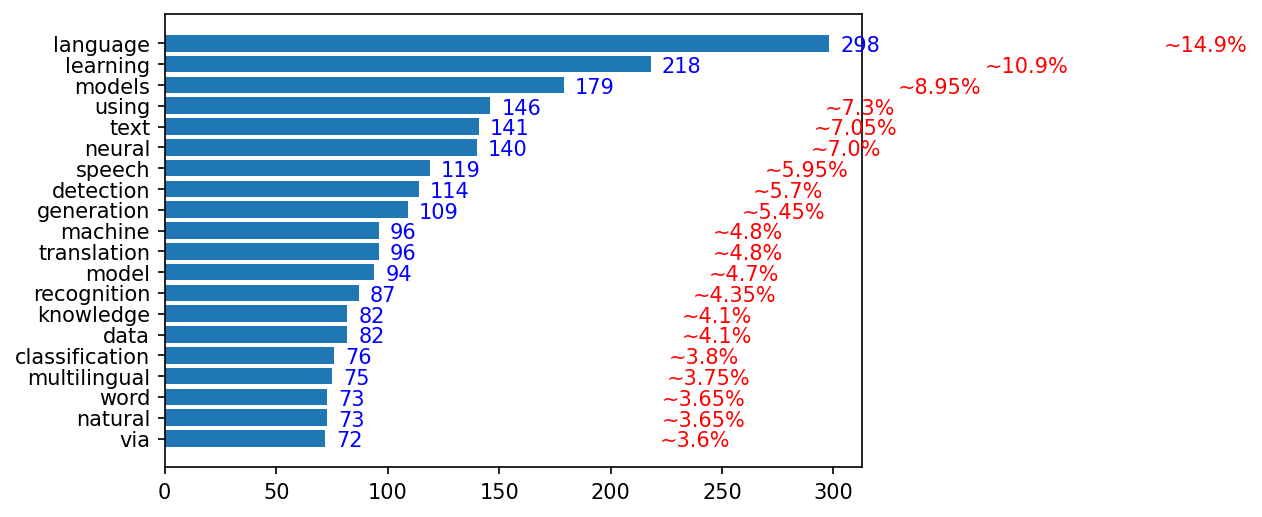

In [6]:
ngram = 1
unigrams = [w for w in all_grams[ngram] if w not in remove_these]
fq_dist_unigrams = FreqDist(unigrams)
# fq_dist_unigrams.plot(30, title='Voila')

c = Counter(fq_dist_unigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)
for i, v in enumerate(values):
    ax.text(v + 5, i-0.4, str(v), color='blue')
    ax.text(v + 150, i-0.4, '~'+str(v/len(values))+'%', color='red')

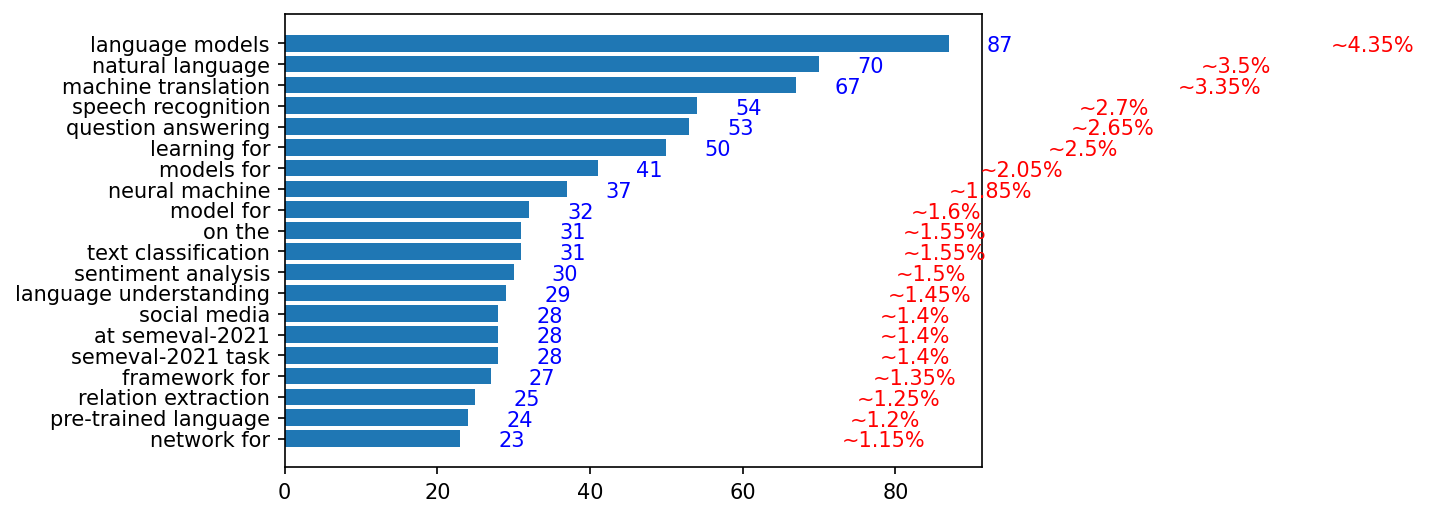

In [7]:
ngram = 2
bigrams = [w for w in all_grams[ngram] if w not in remove_these]
fq_dist_bigrams = FreqDist(bigrams)
# fq_dist_bigrams.plot(30, title='Voila')
c = Counter(fq_dist_bigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)
for i, v in enumerate(values):
    ax.text(v + 5, i-0.4, str(v), color='blue')
    ax.text(v + 50, i-0.4, '~'+str(v/len(values))+'%', color='red')

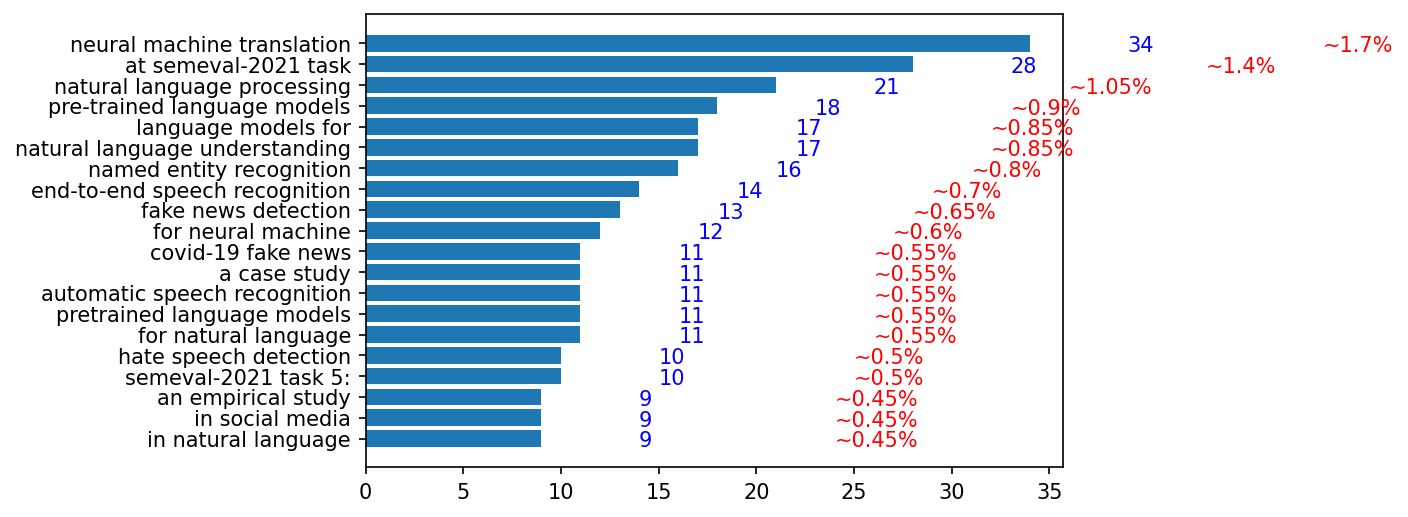

In [8]:
ngram = 3
trigrams = [w for w in all_grams[ngram] if w not in remove_these]
fq_dist_trigrams = FreqDist(trigrams)
# fq_dist_trigrams.plot(30, title='Voila')

c = Counter(fq_dist_trigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)
for i, v in enumerate(values):
    ax.text(v + 5, i-0.4, str(v), color='blue')
    ax.text(v + 15, i-0.4, '~'+str(v/len(values))+'%', color='red')

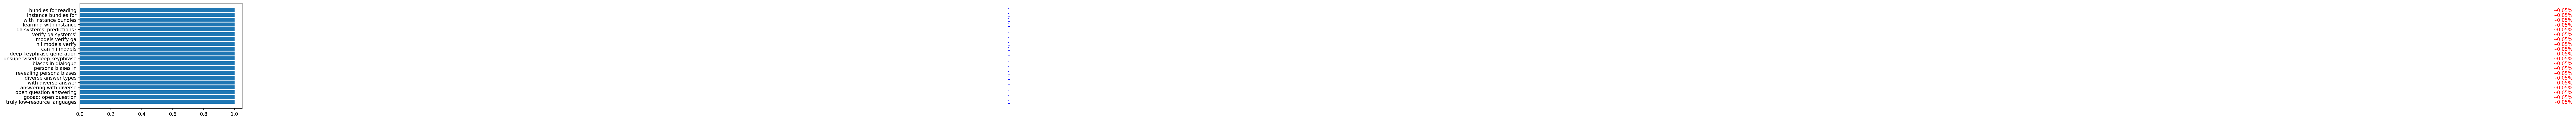

In [17]:
ngram = 3
trigrams = [w for w in all_grams[ngram] if w not in remove_these]
fq_dist_trigrams = FreqDist(trigrams)
# fq_dist_trigrams.plot(30, title='Voila')

c = Counter(fq_dist_trigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common():
    grams.append(k)
    values.append(v)
    
# grams.reverse()
# values.reverse()

grams = grams[-20:]
values = values[-20:]

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)
for i, v in enumerate(values):
    ax.text(v + 5, i-0.4, str(v), color='blue')
    ax.text(v + 15, i-0.4, '~'+str(v/len(values))+'%', color='red')